In [ ]:
import os
import cv2
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# **Get dataset from folder**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def image_to_df(filename, target_name):
    r = open(filename,'rb').read()
    image = np.asarray(bytearray(r), dtype="uint8")

    img_array = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
    img_array = (img_array.flatten())
    img_array = img_array.reshape(-1, 1).T
    df= pd.DataFrame(img_array)
    df['target'] = pd.Series(target_name, index=df.index)
    return df

In [ ]:
## Charging data into img_df
root = '/content/drive/My Drive/Imagenes Rostros Patrones'

os.chdir(root)
img_df = pd.DataFrame() 

for folder in os.listdir():
  folder_path = root + '/' + folder
  os.chdir(folder_path)
  for filename in os.listdir():
    file_path = folder_path + '/' + filename
    temp_df = image_to_df(file_path,folder)
    
    if folder == 'Javier' or folder == 'Carlos C':
      if img_df.empty:
        img_df = temp_df
      else:
        img_df = pd.concat((img_df, temp_df), ignore_index=True)

# **Face recognition**

In [ ]:
## Helper functions. Use when needed. 
def show_original_images(pixels):
  #Displaying Original Images
  fig, axes = plt.subplots(2, 10, figsize=(11,7), subplot_kw={'xticks':[], 'yticks':[]})

  for i, ax in enumerate(axes.flat):
    ax.imshow(np.array(pixels)[i].reshape(512, 512), cmap='gray')
  
  plt.show()

In [ ]:
def show_eigenfaces(pca):
  #Displaying Eigenfaces
  fig, axes = plt.subplots(2, 8, figsize=(9, 4), subplot_kw={'xticks':[], 'yticks':[]})
  
  for i, ax in enumerate(axes.flat):
    print(ax)
    ax.imshow(pca.components_[i].reshape(512, 512), cmap='gray')
    ax.set_title("PC " + str(i+1))
  
  plt.show()

In [ ]:
def show_eigenfaces(pca):
	
	fig, axes = plt.subplots(2, 8, figsize=(9, 4),
	                         subplot_kw={'xticks':[], 'yticks':[]})
 
	for i, ax in enumerate(axes.flat):
			if not(i >= 14):
				ax.imshow(pca.components_[i].reshape(512, 512), cmap='gray')
				ax.set_title("PC " + str(i+1))
	plt.show()

## Paso 1: Lectura y visualización del dataset

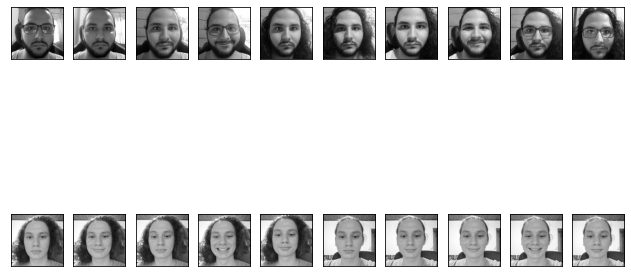

In [ ]:
labels = img_df["target"]
pixels = img_df.drop(["target"], axis=1)

show_original_images(pixels)

## Paso 2: Se divide el dataset en entrenamiento y testeo

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(pixels, labels)

## Paso 3: Se realiza el PCA

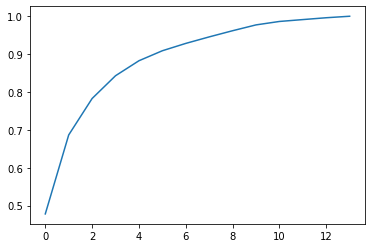

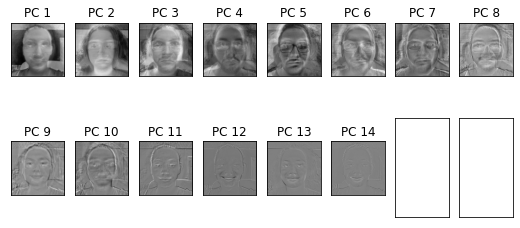

In [ ]:
pca = PCA(n_components=14).fit(x_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()
show_eigenfaces(pca)

## Paso 4: Se le carga la data de entrenamiento al PCA


In [ ]:
x_train_pca = pca.transform(x_train)

## Paso 5: Se inicializa el classifier y se entrena la data

In [ ]:
clf = SVC(kernel='rbf', C=1000, gamma=0.01)
clf = clf.fit(x_train_pca, y_train)

## Paso 6: Se realiza el testeo y se obtiene el reporte de clasificación



In [ ]:
x_test_pca = pca.transform(x_test)

y_pred = clf.predict(x_test_pca)

print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

      Brandon       0.00      0.00      0.00       4.0
     Carlos C       0.00      0.00      0.00       4.0
       Danilo       0.00      0.00      0.00       2.0
       Fabian       0.00      0.00      0.00       1.0
Fabian Zamora       0.00      0.00      0.00       0.0
     Jonathan       0.00      0.00      0.00       2.0
      Kevin S       0.00      0.00      0.00       2.0
          Leo       0.00      0.00      0.00       4.0
      Randald       0.00      0.00      0.00       4.0
      Rodolfo       0.00      0.00      0.00       2.0

     accuracy                           0.00      25.0
    macro avg       0.00      0.00      0.00      25.0
 weighted avg       0.00      0.00      0.00      25.0



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
